In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [35]:
train_data = pd.read_csv('./csv_battery_dataset/train_dataset.csv')
X_train = train_data[['Current', 'Voltage', 'Temperature']]  
y_train = train_data['SOC'] 

test_data = pd.read_csv('./csv_battery_dataset/test_10C.csv')
X_test = test_data[['Current', 'Voltage', 'Temperature']]  
y_test = test_data['SOC'] 

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)  
rmse = np.sqrt(mse) 
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  0.051537629241628725


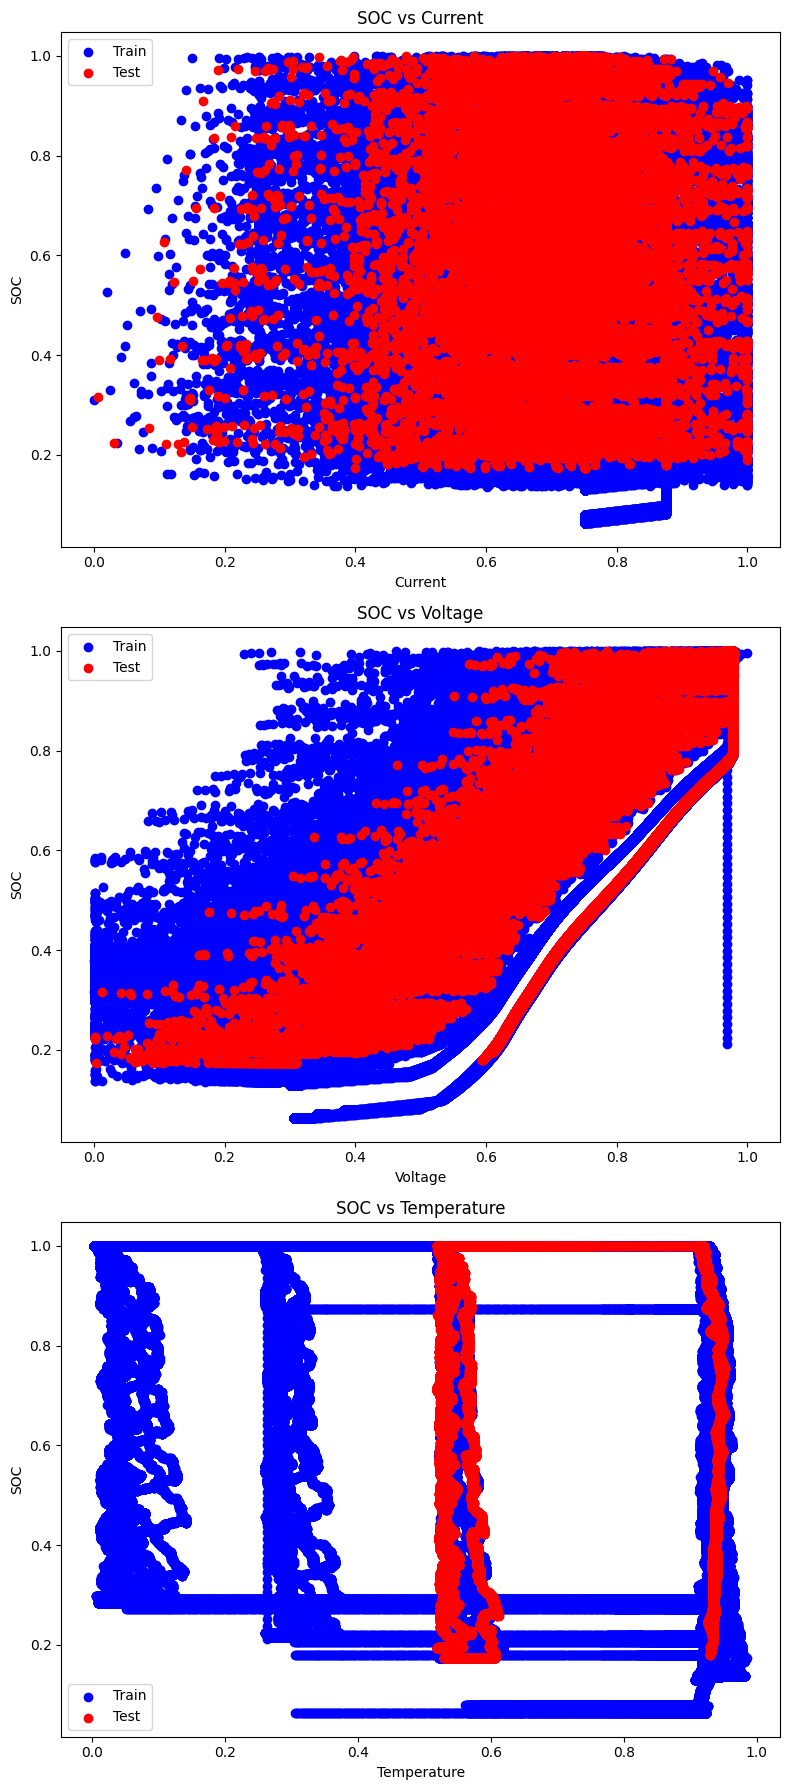

In [37]:
import matplotlib.pyplot as plt

features = ['Current', 'Voltage', 'Temperature']
fig, axs = plt.subplots(len(features), figsize=(8, 6*len(features)))

for i, feature in enumerate(features):
    axs[i].scatter(X_train[feature], y_train, color='blue', label='Train')
    axs[i].scatter(X_test[feature], y_test, color='red', label='Test')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('SOC')
    axs[i].legend()
    axs[i].set_title(f'SOC vs {feature}')

plt.tight_layout()
plt.show()


In [34]:
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train)
model = LinearRegression()
model.fit(X_poly, y_train)
X_test_poly = poly.transform(X_test)
predictions = model.predict(X_test_poly)
mse = mean_squared_error(y_test, predictions)  
rmse = np.sqrt(mse) 
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  0.0344626761922215


(133992,)


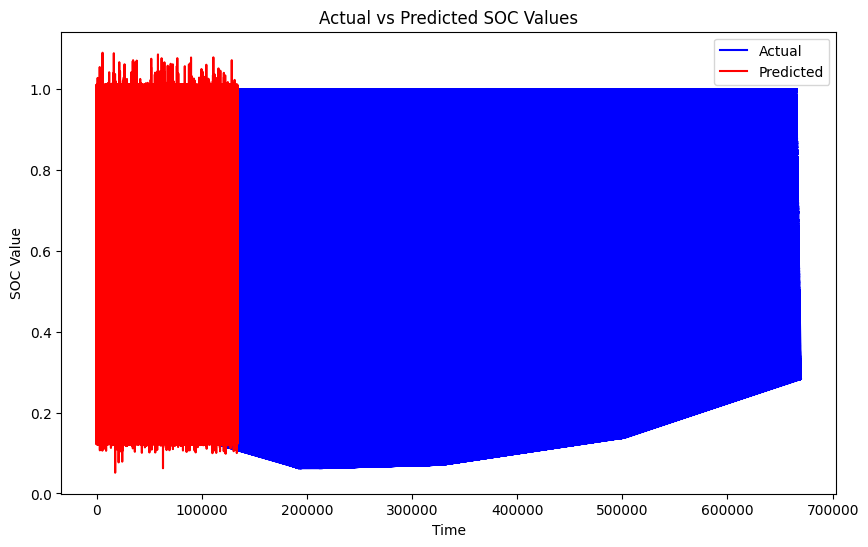

In [9]:
import matplotlib.pyplot as plt

# Assuming 'y_test' are the actual SOC values and 'predictions' are the predicted SOC values
print(predictions.shape)
plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(y_test, color='blue', label='Actual')

# Plot predicted values
plt.plot(predictions, color='red', label='Predicted')

plt.title('Actual vs Predicted SOC Values')
plt.xlabel('Time')
plt.ylabel('SOC Value')
plt.legend()

plt.show()


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import mean_squared_error

# Assuming 'data' is your DataFrame and it has columns 'Current', 'Voltage', 'Temperature', 'SOC'
X = data[['Current', 'Voltage', 'Temperature']]  # Features
y = data['SOC']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Transform matrix of features to matrix of higher order (polynomial) features
poly = PolynomialFeatures(degree = 4)  # You can adjust the degree as needed
X_poly = poly.fit_transform(X_train)

# Fit the Polynomial Regression Model
model = LinearRegression()
model.fit(X_poly, y_train)

# Use the model to make predictions
X_test_poly = poly.transform(X_test)
predictions = model.predict(X_test_poly)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error: ", rmse)

# Plotting a sample of the results
sample_size = 1000  # Adjust as needed
idx = np.random.choice(np.arange(len(y_test)), sample_size, replace=False)
y_test_sample = y_test[idx]
predictions_sample = predictions[idx]

# Rescale the predicted and actual values to be between 0 and 1
scaler = MinMaxScaler()
y_test_scaled = scaler.fit_transform(y_test.reshape(-1, 1))
predictions_scaled = scaler.transform(predictions.reshape(-1, 1))

# Smooth the predicted and actual values using a rolling window
window = 50  # Size of the rolling window
y_test_smooth = pd.Series(y_test_scaled.flatten()).rolling(window).mean()
predictions_smooth = pd.Series(predictions_scaled.flatten()).rolling(window).mean()

# Plotting a sample of the smoothed and rescaled results
plt.figure(figsize=(10, 6))
plt.plot(y_test_smooth, color='blue', label='Actual')
plt.plot(predictions_smooth, color='red', label='Predicted')
plt.title('Smoothed and Rescaled Actual vs Predicted SOC Values')
plt.xlabel('Index')
plt.ylabel('SOC Value')
plt.legend()
plt.show()

# Plotting the residuals
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
plt.plot(residuals, color='purple', label='Residuals')
plt.title('Residuals')
plt.xlabel('Index')
plt.ylabel('Residual Value')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test_sample, color='blue', label='Actual')
plt.plot(predictions_sample, color='red', label='Predicted')
plt.title('Actual vs Predicted SOC Values (Sample)')
plt.xlabel('Index')
plt.ylabel('SOC Value')
plt.legend()
plt.show()


Root Mean Squared Error:  0.03585364113968572


AttributeError: 'Series' object has no attribute 'reshape'